In [153]:
import scipy
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings   
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
ds = scipy.io.loadmat('/export/home/kbalem/Téléchargements/allFloats_12122017.mat')

In [6]:
ds.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dtnum', 'expList', 'expName', 'expOrg', 'expPI', 'fltType', 'indexExp', 'indexFlt', 'lat', 'lon', 'p', 't', 'u', 'v'])

In [371]:
Fds = np.zeros(len(ds['dtnum']),dtype=xr.Dataset)
Fds

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [372]:
keys=['dtnum','lat', 'lon', 'p', 't', 'u', 'v']
for i in range(len(Fds)):    
    temp = xr.Dataset({},{'N_OBS':range(len(ds['dtnum'][i][0]))})
    for k in keys:
        #print(i,k)
        temp[k]=xr.DataArray(ds[k][i][0].flatten(),dims='N_OBS')
    Fds[i]=temp    

In [373]:
#Find area
a=[]
for i in range(len(Fds)):
    sds = Fds[i] 
    ssds = sds.where((sds['lon']>-13.5)&(sds['lon']<-8)&(sds['lat']>37)&(sds['lat']<43),drop=True)
    if len(ssds.N_OBS)>10:
        a.append(i)

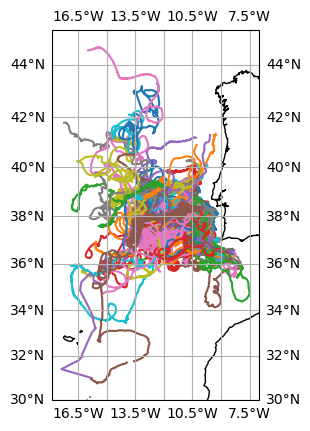

In [374]:
f=plt.figure()
ax=f.add_subplot(111,projection=ccrs.Mercator())
ax.gridlines(draw_labels=True)
ax.coastlines()
for i in a:    
    ax.plot(Fds[i]['lon'],Fds[i]['lat'],transform=ccrs.PlateCarree())

In [380]:
tsds = Fds[a[75]].copy()
tsds['dated'] = xr.DataArray(pd.to_datetime(tsds['dtnum']-719529, unit='D').values,dims='N_OBS')
tsds

<xarray.Dataset> Size: 116kB
Dimensions:  (N_OBS: 1617)
Coordinates:
  * N_OBS    (N_OBS) int64 13kB 0 1 2 3 4 5 6 ... 1611 1612 1613 1614 1615 1616
Data variables:
    dtnum    (N_OBS) float64 13kB 7.283e+05 7.283e+05 ... 7.288e+05 7.288e+05
    lat      (N_OBS) float64 13kB 38.4 38.37 38.3 38.26 ... 30.93 30.94 30.94
    lon      (N_OBS) float64 13kB -10.02 -9.951 -9.969 ... -15.78 -15.79 -15.81
    p        (N_OBS) float64 13kB 929.4 928.6 927.9 933.6 ... 959.1 960.3 961.5
    t        (N_OBS) float64 13kB 12.34 12.33 12.33 12.37 ... 9.51 9.5 9.48 9.47
    u        (N_OBS) float64 13kB 0.1968 0.07116 -0.1772 ... -0.04802 -0.06292
    v        (N_OBS) float64 13kB -0.1351 -0.2046 -0.2066 ... 0.0251 0.01158
    dated    (N_OBS) datetime64[ns] 13kB 1994-01-08T15:59:59.999996650 ... 19...

In [384]:
tsds.to_netcdf('Meddy5.nc')

## 1er cas

Text(0, 0.5, 'Pres')

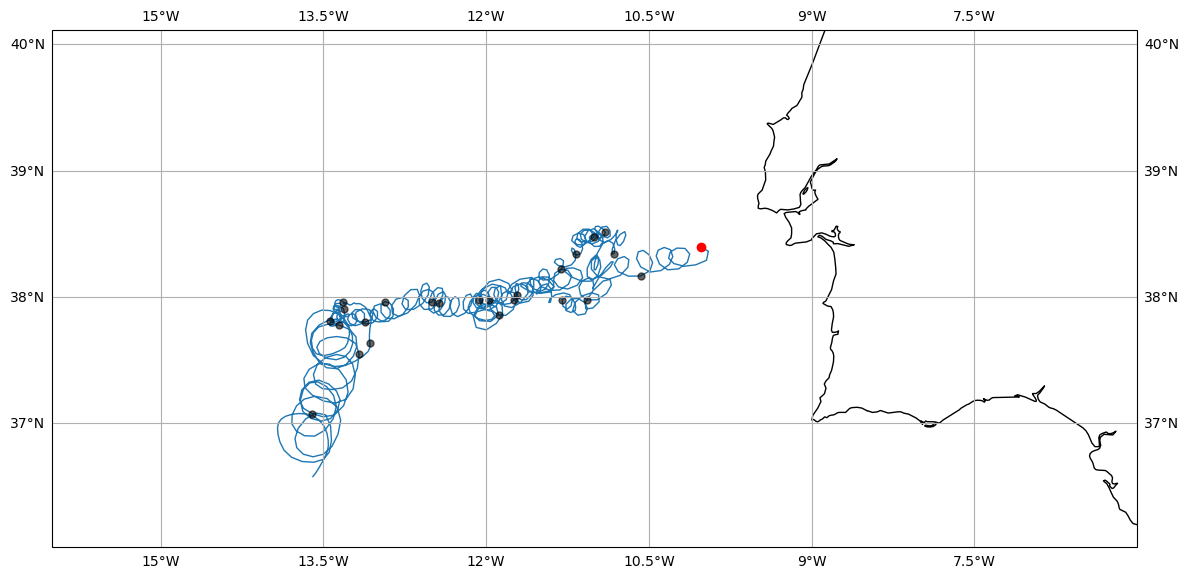

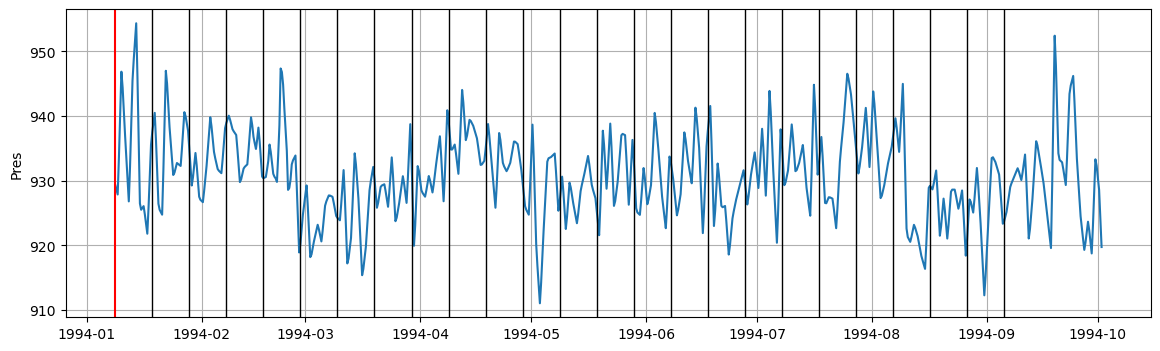

In [365]:
f=plt.figure(figsize=(14,8))
ax=f.add_subplot(111,projection=ccrs.Miller())
ax.gridlines(draw_labels=True)
ax.coastlines()
i=a[75]
ax.plot(Fds[i]['lon'][0:800],Fds[i]['lat'][0:800],'-',linewidth=1,transform=ccrs.PlateCarree())

ax.set_extent([-16,-6,36,40])

ax.plot(Fds[i]['lon'][0],Fds[i]['lat'][0],'ro',transform=ccrs.PlateCarree())
for dz in np.arange(10,250,10):
    zz=np.argmin(np.abs((Fds[i]['dtnum']-Fds[i]['dtnum'][0]).values-dz))
    ax.plot(Fds[i]['lon'][zz],Fds[i]['lat'][zz],'ko',markersize=5,alpha=.6,transform=ccrs.PlateCarree())

dated=pd.to_datetime(Fds[i]['dtnum']-719529, unit='D')    
f2=plt.figure(figsize=(14,4))  
ax1=f2.add_subplot(111)    
ax1.plot(dated[0:800],Fds[i]['p'][0:800])
ax1.grid()

ax1.axvline(dated[0],color='r')
for dz in np.arange(10,250,10):
    zz=np.argmin(np.abs((Fds[i]['dtnum']-Fds[i]['dtnum'][0]).values-dz))
    ax1.axvline(dated[zz],color='k',linewidth=1)
ax1.set_ylabel('Pres')

## 2eme cas

Text(0, 0.5, 'Pres')

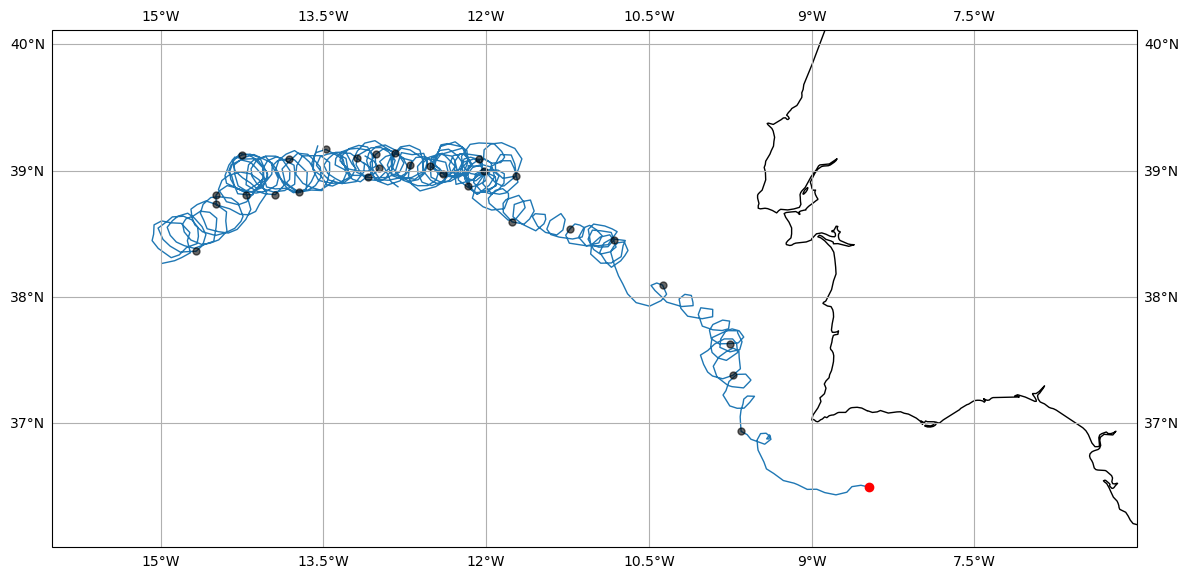

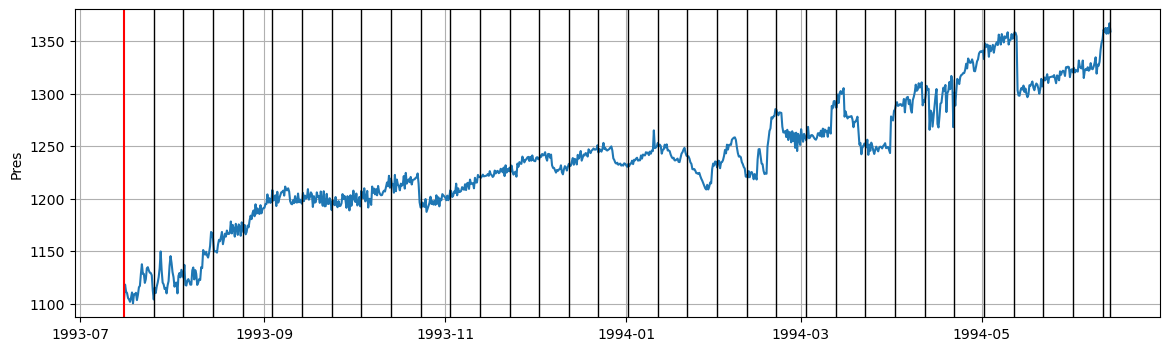

In [366]:
f=plt.figure(figsize=(14,8))
ax=f.add_subplot(111,projection=ccrs.Miller())
ax.gridlines(draw_labels=True)
ax.coastlines()
i=a[8]
ax.plot(Fds[i]['lon'],Fds[i]['lat'],'-',linewidth=1,transform=ccrs.PlateCarree())

ax.set_extent([-16,-6,36,40])

ax.plot(Fds[i]['lon'][0],Fds[i]['lat'][0],'ro',transform=ccrs.PlateCarree())
for dz in np.arange(10,350,10):
    zz=np.argmin(np.abs((Fds[i]['dtnum']-Fds[i]['dtnum'][0]).values-dz))
    ax.plot(Fds[i]['lon'][zz],Fds[i]['lat'][zz],'ko',markersize=5,alpha=.6,transform=ccrs.PlateCarree())

dated=pd.to_datetime(Fds[i]['dtnum']-719529, unit='D')    
f2=plt.figure(figsize=(14,4))  
ax1=f2.add_subplot(111)    
ax1.plot(dated,Fds[i]['p'])
ax1.grid()

ax1.axvline(dated[0],color='r')
for dz in np.arange(10,350,10):
    zz=np.argmin(np.abs((Fds[i]['dtnum']-Fds[i]['dtnum'][0]).values-dz))
    ax1.axvline(dated[zz],color='k',linewidth=1)
ax1.set_ylabel('Pres')